In [1]:
%load_ext blackcellmagic

In [2]:
import os
os.chdir("..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
from tqdm.auto import tqdm  
import warnings

warnings.filterwarnings("ignore")

from src.data.process_pdfs import convert_pdf_to_txt

In [4]:
pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

## 1. Extract text from pdfs
(simple method)

In [5]:
df = pd.read_excel('data/interim/reports_labeled_clean.xlsx')
df

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False,0_888.L_2020.pdf
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,1_A.N_2020.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,12676,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,False,NaN,False,True,False,12676_ZBH.N_2016.pdf
8155,12677,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2015,FY-5,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2015.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,False,NaN,False,False,False,12677_ZBH.N_2015.pdf


In [7]:
tqdm.pandas() # Display progressbar
df['CSR_Text'] = df['CSR_Filename'].progress_apply(convert_pdf_to_txt)

In [41]:
df.to_pickle('data/interim/reports_text.p')

In [42]:
# Check for errors
df[df['CSR_Text'] == 'Error']

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text
1626,2127,GOGL.OQ,Golden Ocean Group Ltd,BMG396372051,GOGL,United States of America,2019,FY-1,https://www.goldenocean.bm/wp-content/uploads/2019_ESG-Report-Golden-Ocean_05262020.pdf,False,False,True,False,True,False,False,True,False,NaN,False,False,True,NaN,False,True,False,2127_GOGL.OQ_2019.pdf,Error
3012,4867,BMEB.L,B&M European Value Retail SA,LU1072616219,BME,United Kingdom,2016,FY-5,http://bandmretail-ar2016.html.investis.com/publication/contents/pdfweb.pdf,False,False,False,True,True,True,False,True,False,NaN,False,True,False,NaN,False,True,False,4867_BMEB.L_2016.pdf,Error
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,11856,SCS.N,Steelcase Inc,US8581552036,SCS,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/s/NYSE_SCS_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,11856_SCS.N_2016.pdf,Error
7772,12294,VALE.N,Vale SA,US91912E1055,VALE,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/v/NYSE_VALE_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,12294_VALE.N_2016.pdf,Error


In [43]:
errors = df[df['CSR_Text'] == 'Error']
errors.to_excel('data/interim/errors.xlsx')

In [44]:
# Drop rows with errors
df = df[df['CSR_Text'] != 'Error']
df

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False,0_888.L_2020.pdf,888 HOLDINGS PLC\n\nANNUAL REPORT & ACCOUNTS 2020\n\n A YEAR OF \nSTRONG GROWTH \n\n888 IS ONE ...
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,1_A.N_2020.pdf,Delivering on \nour Promises\n\n2020 Corporate Social Responsibility Report\n\n1\n\n Letter fro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,12676,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,False,NaN,False,True,False,12676_ZBH.N_2016.pdf,E N V I R O N M E N T A L \n\n \n\nS O C I A L \n\nG O V E R N A N C E\n\nSustainability \nRep...
8155,12677,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2015,FY-5,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2015.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,False,NaN,False,False,False,12677_ZBH.N_2015.pdf,E N V I R O N M E N T A L \n\n \n\nS O C I A L \n\nG O V E R N A N C E\n\nSustainability \nRep...


In [45]:
df.to_pickle('data/interim/reports_text_clean.p')

## 2. Explore final data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 0 to 8155
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         8141 non-null   int64  
 1   Identifier                 8141 non-null   object 
 2   Company_Name               8141 non-null   object 
 3   ISIN                       8141 non-null   object 
 4   Ticker                     8031 non-null   object 
 5   Country_of_Exchange        8141 non-null   object 
 6   Financial_Period_Absolute  8141 non-null   int64  
 7   Financial_Period_Relative  8141 non-null   object 
 8   CSR_URL                    8141 non-null   object 
 9   SDG_1                      8141 non-null   bool   
 10  SDG_2                      8141 non-null   bool   
 11  SDG_3                      8141 non-null   bool   
 12  SDG_4                      8141 non-null   bool   
 13  SDG_5                      8141 non-null   bool 

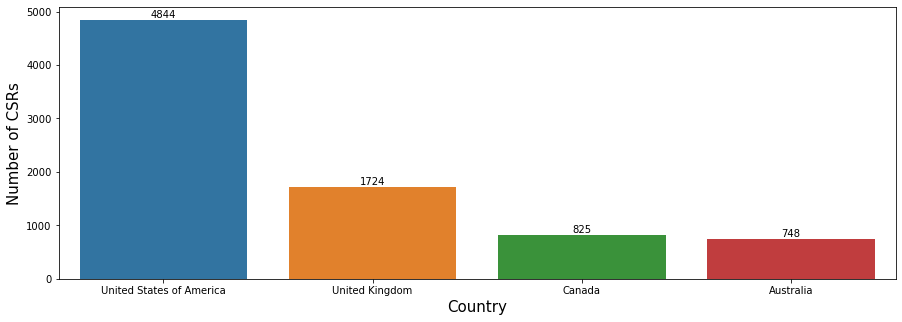

In [47]:
# Number of CSRs per country
xs = []
ys = []
for country in df['Country_of_Exchange'].unique():
    xs.append(country)
    ys.append(sum(df['Country_of_Exchange'] == country))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys, order = df['Country_of_Exchange'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xlabel("Country", fontsize=15)
plt.ylabel("Number of CSRs", fontsize=15)
plt.show()

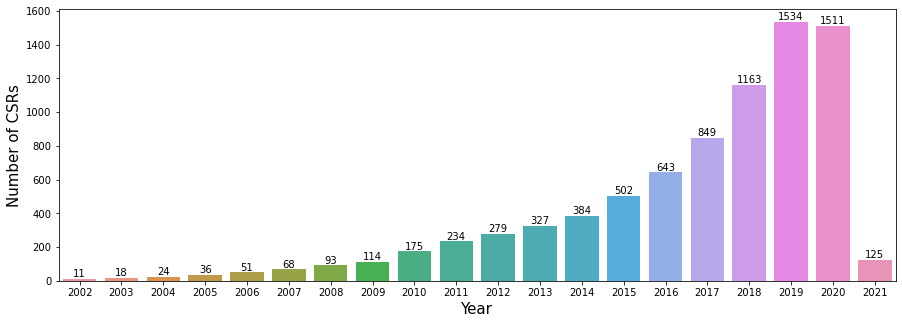

In [48]:
# Number of CSRs per year    
xs = []
ys = []
for year in np.sort(df['Financial_Period_Absolute'].unique()):
    xs.append(year)
    ys.append(sum(df['Financial_Period_Absolute'].astype(str) == str(year)))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of CSRs", fontsize=15)
plt.show()

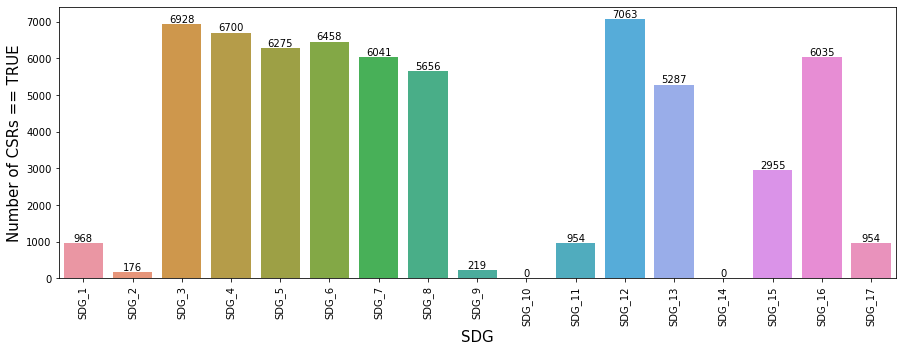

In [49]:
# Number of TRUE per SDG
xs = []
ys = []
for column in df.columns[9:26]:
    xs.append(column)
    ys.append(sum(df[column] == True))

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.xlabel("SDG", fontsize=15)
plt.ylabel("Number of CSRs == TRUE", fontsize=15)
plt.show()  

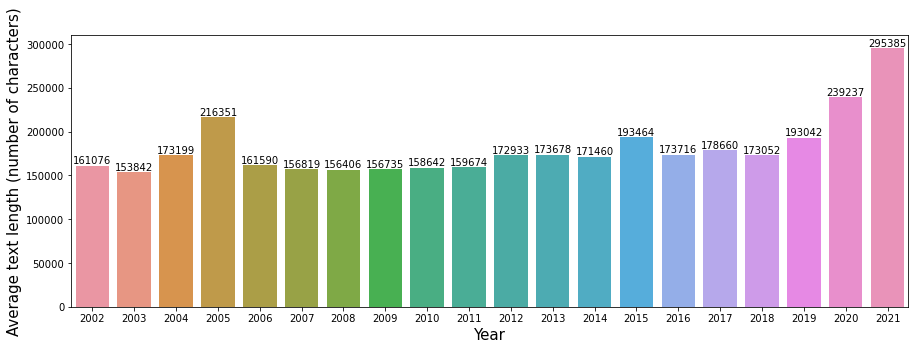

In [50]:
# Average text length per year    
xs = []
ys = []
for year in np.sort(df['Financial_Period_Absolute'].unique()):
    xs.append(year)
    ys.append(df[df['Financial_Period_Absolute'].astype(str) == str(year)]['CSR_Text'].apply(len).mean())

plt.figure(figsize=(15,5))
ax = sns.barplot(x=xs, y=ys)
ax.bar_label(ax.containers[0])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average text length (number of characters)", fontsize=15)
plt.show()

## 3. Clean text 
(replace by more advanced technique)

In [5]:
df = pd.read_pickle('data/interim/reports_text_clean.p')

In [6]:
# Clean text and define sentences

import nltk
nltk.download('wordnet')
nltk.download('punkt')

import string
import re

def clean_text(text):
  
    # Remove non ASCII characters
    printable = set(string.printable)
    text = ''.join(filter(lambda x: x in printable, text))
    
    # Split text into sentences
    lines = []
    prev = ""
    for line in text.split('\n'):
    # Aggregate consecutive lines where text may be broken down
    # Only if next line starts with a space or previous line does not end with a dot
        if(line.startswith(' ') or not prev.endswith('.')):
            prev = prev + ' ' + line
        else:
            # New paragraph
            lines.append(prev)
            prev = line
        
    # Don't forget left-over paragraph
    lines.append(prev)
 
    # Clean paragraphs from extra space, unwanted characters, urls, etc.
    sentences = ''
    for line in lines:
        # removing header number
        line = re.sub(r'^\s?\d+(.*)$', r'\1', line)
        # removing trailing spaces
        line = line.strip()
        # words may be split between lines, ensure we link them back together
        line = re.sub(r'\s?-\s?', '-', line)
        # remove space prior to punctuation
        line = re.sub(r'\s?([,:;\.])', r'\1', line)
        # ESG contains a lot of figures that are not relevant to grammatical structure
        line = re.sub(r'\d{5,}', r' ', line)
        # remove mentions of URLs
        line = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', r' ', line)
        # remove multiple spaces
        line = re.sub(r'\s+', ' ', line)
        # remove multiple dot
        line = re.sub(r'\.+', '.', line)
      
        # split paragraphs into well defined sentences using nltk
        for part in nltk.sent_tokenize(line):
            sentences = sentences + ' ' + str(part).strip()
 
    return sentences

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jonat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
tqdm.pandas() # Display progressbar
df['CSR_Text_clean'] = df['CSR_Text'].progress_apply(clean_text)
df

  0%|          | 0/8141 [00:00<?, ?it/s]

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text,CSR_Text_clean
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False,0_888.L_2020.pdf,888 HOLDINGS PLC\n\nANNUAL REPORT & ACCOUNTS 2020\n\n A YEAR OF \nSTRONG GROWTH \n\n888 IS ONE ...,HOLDINGS PLC ANNUAL REPORT & ACCOUNTS 2020 A YEAR OF STRONG GROWTH 888 IS ONE OF THE WORLDS LEA...
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,1_A.N_2020.pdf,Delivering on \nour Promises\n\n2020 Corporate Social Responsibility Report\n\n1\n\n Letter fro...,Delivering on our Promises 2020 Corporate Social Responsibility Report 1 Letter from the Presid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,12676,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,False,NaN,False,True,False,12676_ZBH.N_2016.pdf,E N V I R O N M E N T A L \n\n \n\nS O C I A L \n\nG O V E R N A N C E\n\nSustainability \nRep...,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2016 T A B L E ...
8155,12677,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2015,FY-5,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2015.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,False,NaN,False,False,False,12677_ZBH.N_2015.pdf,E N V I R O N M E N T A L \n\n \n\nS O C I A L \n\nG O V E R N A N C E\n\nSustainability \nRep...,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2015 Investing ...


## 4. Tokenize text 

In [7]:
# Tokenization

import re
import nltk

def transform_text(text):
    
    # Convert to lowercase
    text = text.lower()   
    
    # Remove everything except alphabetical characters 
    text= re.sub("[^a-zA-Z]"," ",text) 
            
    # Tokenize (convert from string to list)
    lst_text = text.split()
    
    # Remove Stopwords
    lst_text = [word for word in lst_text if word not in nltk.corpus.stopwords.words("english")]
                
    # Lemmatisation (convert the word into root word)
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_text = [lem.lemmatize(word) for word in lst_text]
            
    # Convert back to string from list
    text = " ".join(lst_text)
    
    return text

In [9]:
tqdm.pandas() # Display progressbar
df['CSR_Text_tokenized'] = df['CSR_Text'].progress_apply(transform_text)
df

  0%|          | 0/8141 [00:00<?, ?it/s]

,ID,Identifier,Company_Name,ISIN,Ticker,Country_of_Exchange,Financial_Period_Absolute,Financial_Period_Relative,CSR_URL,SDG_1,SDG_2,SDG_3,SDG_4,SDG_5,SDG_6,SDG_7,SDG_8,SDG_9,SDG_10,SDG_11,SDG_12,SDG_13,SDG_14,SDG_15,SDG_16,SDG_17,CSR_Filename,CSR_Text,CSR_Text_clean,CSR_Text_tokenized
0,0,888.L,888 Holdings PLC,GI000A0F6407,888,United Kingdom,2020,FY0,https://corporate.888.com/wp-content/uploads/2021/04/2020-Annual-Report.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,False,True,False,0_888.L_2020.pdf,888 HOLDINGS PLC\n\nANNUAL REPORT & ACCOUNTS 2020\n\n A YEAR OF \nSTRONG GROWTH \n\n888 IS ONE ...,HOLDINGS PLC ANNUAL REPORT & ACCOUNTS 2020 A YEAR OF STRONG GROWTH 888 IS ONE OF THE WORLDS LEA...,holding plc annual report account year strong growth one world leading online betting gaming com...
1,1,A.N,Agilent Technologies Inc,US00846U1016,A,United States of America,2020,FY0,https://www.agilent.com/about/companyinfo/sustainability/Agilent-Report-CSR-2020.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,True,NaN,True,True,False,1_A.N_2020.pdf,Delivering on \nour Promises\n\n2020 Corporate Social Responsibility Report\n\n1\n\n Letter fro...,Delivering on our Promises 2020 Corporate Social Responsibility Report 1 Letter from the Presid...,delivering promise corporate social responsibility report letter president stakeholder engagemen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,12676,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2016,FY-4,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2016.pdf,False,False,True,True,True,True,True,True,False,NaN,False,True,False,NaN,False,True,False,12676_ZBH.N_2016.pdf,E N V I R O N M E N T A L \n\n \n\nS O C I A L \n\nG O V E R N A N C E\n\nSustainability \nRep...,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2016 T A B L E ...,e n v r n e n l c l g v e r n n c e sustainability report b l e f c n e n company profile corpor...
8155,12677,ZBH.N,Zimmer Biomet Holdings Inc,US98956P1021,ZBH,United States of America,2015,FY-5,https://www.responsibilityreports.com/HostedData/ResponsibilityReportArchive/z/NYSE_ZBH_2015.pdf,False,False,True,True,False,True,True,False,False,NaN,False,True,False,NaN,False,False,False,12677_ZBH.N_2015.pdf,E N V I R O N M E N T A L \n\n \n\nS O C I A L \n\nG O V E R N A N C E\n\nSustainability \nRep...,E N V I R O N M E N T A L S O C I A L G O V E R N A N C E Sustainability Report 2015 Investing ...,e n v r n e n l c l g v e r n n c e sustainability report investing future world b l e f c n e n...


In [10]:
df.to_pickle('data/processed/reports_tokenized.p')